## Dataset 불러오기

In [2]:
import pandas as pd

train = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/train.csv")
test = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/test.csv")
age_gender = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/age_gender_info.csv")

## Columns명 변경 : 지하철, 버스

In [3]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [4]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철',
       '버스', '단지내주차면수', '등록차량수']

## 임대보증금, 임대료 문자열 0으로 변경

In [5]:
train.loc[train['임대보증금'] == "-",'임대보증금'] = 0

In [6]:
train.loc[train['임대료'] == "-",'임대료'] = 0

## float -> int 변환 : 전용면적, 단지내주차면수, 등록차량수, 공가수

나중에 임대보증금 임대료도 null값 다 채우고 int 변환

In [7]:
# 전용면적 평수 변환
train['전용면적']=round(train['전용면적']*0.3025,0)

In [8]:
train[['전용면적','공가수','단지내주차면수','등록차량수']] = train[['전용면적','공가수','단지내주차면수','등록차량수']].astype(int)

## 버스 null값 4개 처리

In [9]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스            4
단지내주차면수       0
등록차량수         0
dtype: int64

In [10]:
# 버스 null값 아파트가 양산에 있다고 추정
# 근처 버스정류장을 새어보니 2개가 있었고
# 양산은 지하철이 도로를 다니지 않기 때문에 0개를 넣음
train.loc[train['버스'].isnull(),['지하철','버스']] = [0,2]

In [11]:
# 클린
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

## 지하철 null값 0으로 채워주기


광역시에 지하철이 많이 다니기 때문에 광역시를 제외한 시,도에는 0을 채워주었다.
그러고 광역시끼리 해서 평균을 계산해봤을때, 0.xx가 나와서 null값을 0으로 채워주기로 하였다.

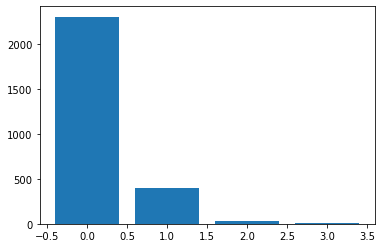

In [16]:
import matplotlib.pyplot as plt
x = [0,1,2,3]
y = [2306,400,33,6] # nan:230

plt.bar(x,y)
plt.show()

In [12]:
train['지하철'].fillna(0, inplace=True) 

## 총세대수 != sum(전용면적별세대수)

In [13]:
# 총세대수와 전용면적별세대수의 합이 다르기 때문에
# 어떤 단지코드가 다른지 알아보기 위한 코드

code=train.groupby(['단지코드'])
code=code.agg({'총세대수':'mean','전용면적별세대수':'sum'}).reset_index()
diff=[]
for i in range(len(code)):
    if code['총세대수'][i]!=code['전용면적별세대수'][i]:
        diff.append(code['단지코드'][i])
print(diff)  
len(diff)

['C1024', 'C1068', 'C1156', 'C1206', 'C1218', 'C1312', 'C1344', 'C1424', 'C1490', 'C1584', 'C1695', 'C1732', 'C1740', 'C1804', 'C1850', 'C1894', 'C1910', 'C1925', 'C1970', 'C2013', 'C2139', 'C2142', 'C2156', 'C2186', 'C2225', 'C2245', 'C2298', 'C2319', 'C2362', 'C2405', 'C2433', 'C2453', 'C2470', 'C2508', 'C2520', 'C2549', 'C2556', 'C2568', 'C2620', 'C2644']


40

In [15]:
for i in diff:
    code[code['단지코드']==i]

총세대수 - 분양, 임대<br>
전용면적별세대수 - 임대를 포함시킨다.

합의 차이가 1 나는 경우 대부분 상가가 분양된 경우가 많다.